# UrbanECG: FloodNet Exploratory Data Analysis
Developer: @mattwfranchi, FARLAB @ Cornell Tech

Last Edited: 12/05/2023

### Description

In [19]:
FLOODNET_DATA = ["../data/nyc_flooding/floodnet-flood-sensor-oct-2023.csv"]
NYC_CT_SHP = "../data/geo/nyc_ct/nyct2020.shp"

In [9]:
### Module Imports 
import sys 
import os 

sys.path.append('../')
from src.utils.logger import setup_logger 
from src.utils.read_csv import read_csv

from user.params.data import COORD_CRS, PROJ_CRS

In [23]:
# Library Imports 
import pandas as pd 
import geopandas as gpd 
import matplotlib.pyplot as plt

In [ ]:
# toggle latex plotting 
plt.rc('text', usetex=True)

In [11]:
floodnet_data = pd.concat([pd.read_csv(f, low_memory=False) for f in FLOODNET_DATA])

In [12]:
floodnet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839341 entries, 0 to 1839340
Data columns (total 21 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   time                         object 
 1   deployment_id                object 
 2   dev_id                       object 
 3   depth_raw_mm                 float64
 4   depth_filt_mm                float64
 5   depth_proc_mm                float64
 6   batt_v                       float64
 7   f_cnt                        float64
 8   dist_mm                      float64
 9   lat                          float64
 10  lon                          float64
 11  date_deployed                object 
 12  deploy_type                  object 
 13  sensor_display_name          object 
 14  sensor_address_street        object 
 15  sensor_address_borough       object 
 16  sensor_address_neighborhood  object 
 17  nearest_weather_station      object 
 18  nearest_tidal_id             object 
 19  

In [13]:
# convert floodnet_data to gdf, usijg 'lat', 'lon'
floodnet_data = gpd.GeoDataFrame(floodnet_data, geometry=gpd.points_from_xy(floodnet_data.lon, floodnet_data.lat), crs=COORD_CRS)
floodnet_data = floodnet_data.to_crs(PROJ_CRS)

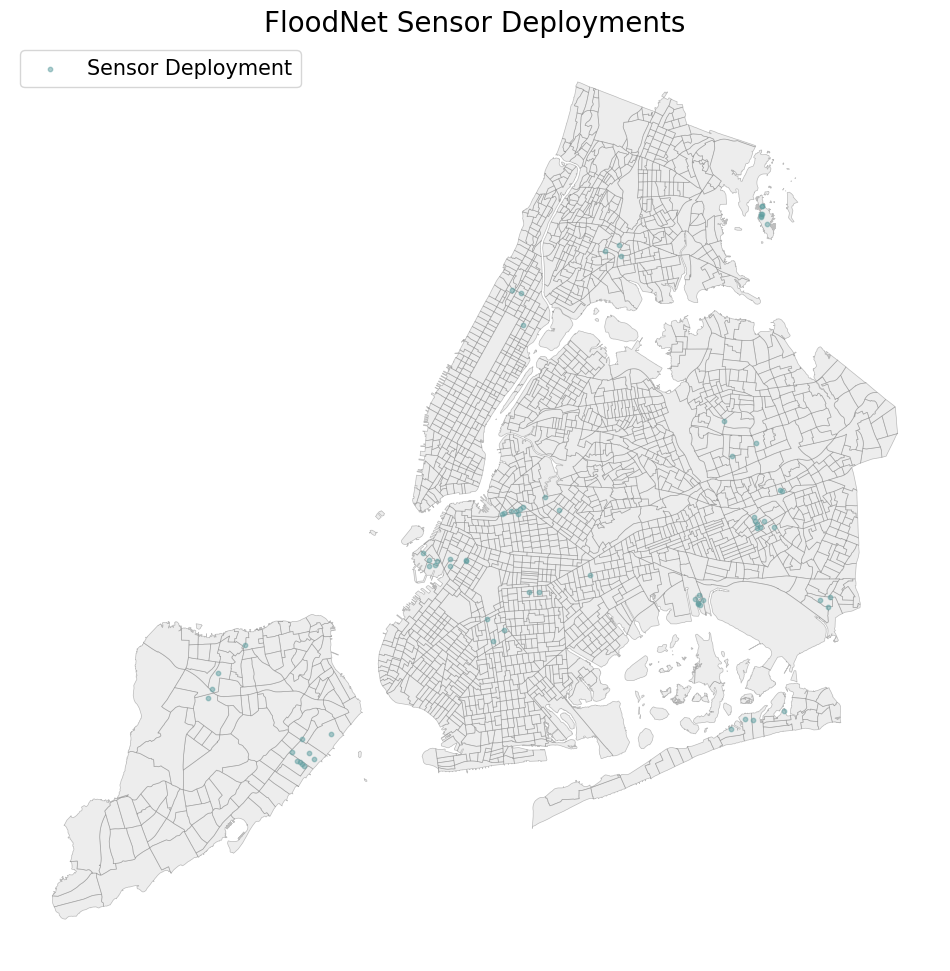

In [46]:
nyc_ct = gpd.read_file(NYC_CT_SHP).to_crs(PROJ_CRS)

fig, ax = plt.subplots(figsize=(12,12))
nyc_ct.plot(ax=ax, color='gainsboro', edgecolor='grey', alpha=0.5, linewidth=0.5)
floodnet_data.groupby('deployment_id').agg('first').plot(ax=ax, color='cadetblue', markersize=10, alpha=0.5)
ax.set_title('FloodNet Sensor Deployments', fontsize=20)
# add legend 
ax.legend(['Sensor Deployment'], fontsize=15, loc='upper left')
ax.set_axis_off()

plt.savefig('../output/street_flooding/plots/floodnet_sensor_deployments.png', dpi=300, bbox_inches='tight')

In [47]:
# write sensor deployment locations to a csv 
floodnet_data.groupby('deployment_id').agg('first')['geometry'].to_csv('../data/nyc_flooding/floodnet_sensor_coordinates.csv')